In [1]:
import yfinance as yf
import pandas as pd

# 애플 주식 데이터 불러오기
aapl = yf.Ticker("AAPL")
# 최근 1년간의 일일 데이터 가져오기
data = aapl.history(period="1y")

print(data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-10-24 00:00:00-04:00  172.168993  172.785832  170.577133  172.557007   
2023-10-25 00:00:00-04:00  171.004955  172.178941  169.781206  170.228928   
2023-10-26 00:00:00-04:00  169.502639  170.507506  164.826569  166.040359   
2023-10-27 00:00:00-04:00  166.060243  168.099809  165.980648  167.363571   
2023-10-30 00:00:00-04:00  168.159511  170.298559  168.010266  169.423035   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-10-24 00:00:00-04:00  43816600        0.0           0.0  
2023-10-25 00:00:00-04:00  57157000        0.0           0.0  
2023-10-26 00:00:00-04:00  70625300        0.0           0.0  
2023-10-27 00:00:00-04:00  58499100        0.0           0.0  
2023-10-30 00:00:00-04:00  51131000        0.0           0.0  


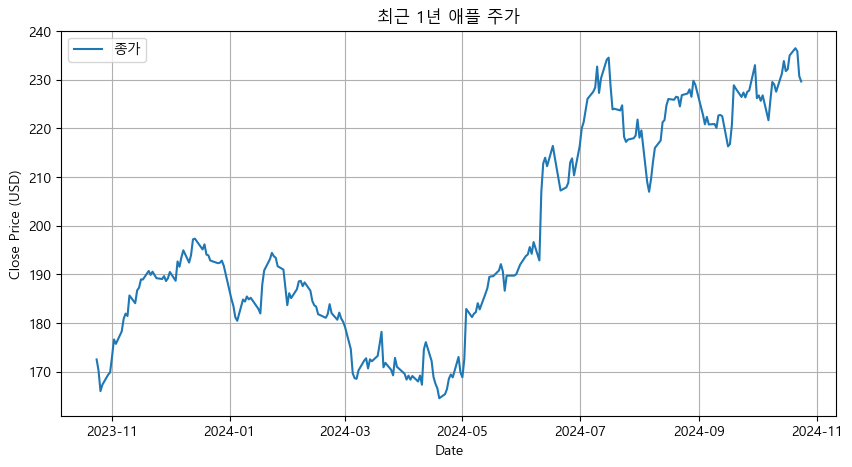

In [7]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 종가 시각화
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='종가')
plt.title('최근 1년 애플 주가')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

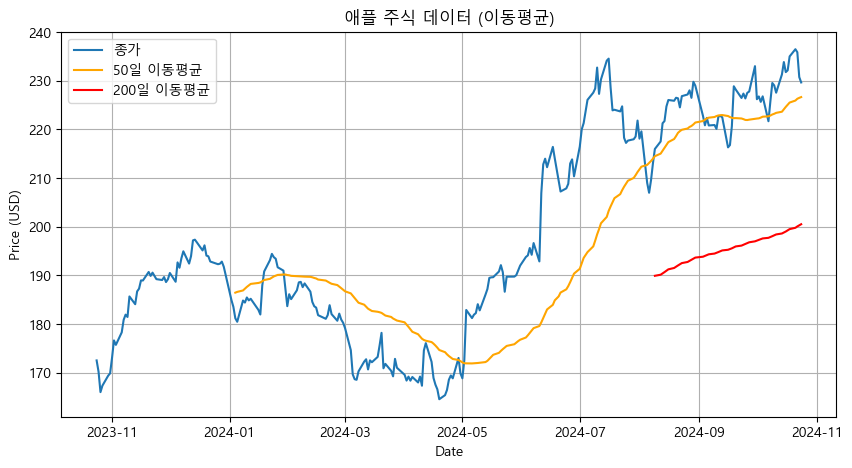

In [6]:
# 50일 및 200일 이동 평균 계산
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# 이동 평균 시각화
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='종가')
plt.plot(data.index, data['50_MA'], label='50일 이동평균', color='orange')
plt.plot(data.index, data['200_MA'], label='200일 이동평균', color='red')
plt.title('애플 주식 데이터 (이동평균)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [2]:
from kiwipiepy import Kiwi

# Kiwi 객체 초기화
kiwi = Kiwi()

# 예시 토큰화된 단어 리스트
tokens = ["안녕", "세상", "즐거운", "하루"]

# 각 토큰의 품사 추출
for token in tokens:
    analyzed = kiwi.analyze(token)
    # 분석 결과는 여러 형태일 수 있지만, 여기서는 가장 가능성 높은 첫 번째 분석 결과만 사용
    if analyzed:
        print(analyzed)
        morphs = analyzed[0][0]
        for token in morphs:
            print(f"단어: {token.form}, 품사: {token.tag}")


[([Token(form='안녕', tag='IC', start=0, len=2)], -15.292085647583008)]
단어: 안녕, 품사: IC
[([Token(form='세상', tag='NNG', start=0, len=2)], -15.907182693481445)]
단어: 세상, 품사: NNG
[([Token(form='즐겁', tag='VA-I', start=0, len=3), Token(form='은', tag='ETM', start=2, len=1)], -16.487154006958008)]
단어: 즐겁, 품사: VA-I
단어: 은, 품사: ETM
[([Token(form='하루', tag='NNG', start=0, len=2)], -15.44548511505127)]
단어: 하루, 품사: NNG
